<a href="https://colab.research.google.com/github/chaiminwoo0223/Deep-Neural-Network/blob/main/04_training_deep_neual_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

# 그레디언트 소실과 폭주
## 1.글로럿과 He 초기화

In [2]:
[initializer for initializer in dir(keras.initializers) if not initializer.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [3]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [4]:
init = keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

## 2.수렴하지 않는 활성화 함수

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
z = np.linspace(-5, 5, 200)
z

array([-5.        , -4.94974874, -4.89949749, -4.84924623, -4.79899497,
       -4.74874372, -4.69849246, -4.64824121, -4.59798995, -4.54773869,
       -4.49748744, -4.44723618, -4.39698492, -4.34673367, -4.29648241,
       -4.24623116, -4.1959799 , -4.14572864, -4.09547739, -4.04522613,
       -3.99497487, -3.94472362, -3.89447236, -3.84422111, -3.79396985,
       -3.74371859, -3.69346734, -3.64321608, -3.59296482, -3.54271357,
       -3.49246231, -3.44221106, -3.3919598 , -3.34170854, -3.29145729,
       -3.24120603, -3.19095477, -3.14070352, -3.09045226, -3.04020101,
       -2.98994975, -2.93969849, -2.88944724, -2.83919598, -2.78894472,
       -2.73869347, -2.68844221, -2.63819095, -2.5879397 , -2.53768844,
       -2.48743719, -2.43718593, -2.38693467, -2.33668342, -2.28643216,
       -2.2361809 , -2.18592965, -2.13567839, -2.08542714, -2.03517588,
       -1.98492462, -1.93467337, -1.88442211, -1.83417085, -1.7839196 ,
       -1.73366834, -1.68341709, -1.63316583, -1.58291457, -1.53

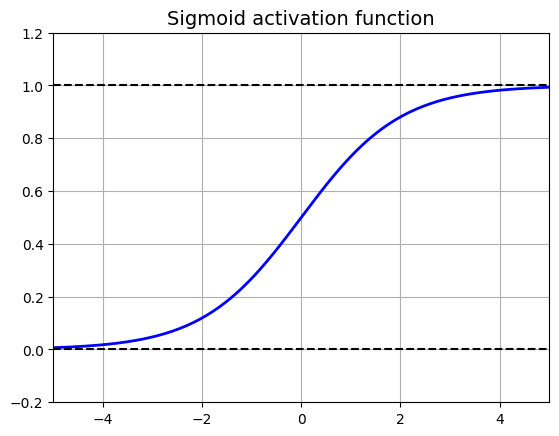

In [7]:
# 로지스틱 시그모이드 함수
def logit(z):
    return 1 / (1 + np.exp(-z))

plt.plot(z, logit(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [8]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="sigmoid",
                       kernel_initializer=tf.keras.initializers.RandomNormal(0.0, 1.0)),
    keras.layers.Dense(100, activation="sigmoid",
                       kernel_initializer=tf.keras.initializers.RandomNormal(0.0, 1.0)),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 7ms/step - loss: 2.2211 - accuracy: 0.1868 - val_loss: 2.0432 - val_accuracy: 0.2840
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 1.9283 - accuracy: 0.3682 - val_loss: 1.8091 - val_accuracy: 0.4578
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.7239 - accuracy: 0.4979 - val_loss: 1.6259 - val_accuracy: 0.5524
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 1.5625 - accuracy: 0.5701 - val_loss: 1.4814 - val_accuracy: 0.6010
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 1.4348 - accuracy: 0.6093 - val_loss: 1.3685 - val_accuracy: 0.6326
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3331 - accuracy: 0.6330 - val_loss: 1.2780 - val_accuracy: 0.6468
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.2514 - accuracy: 0.6489 - val_loss: 1.2055 - val_accurac

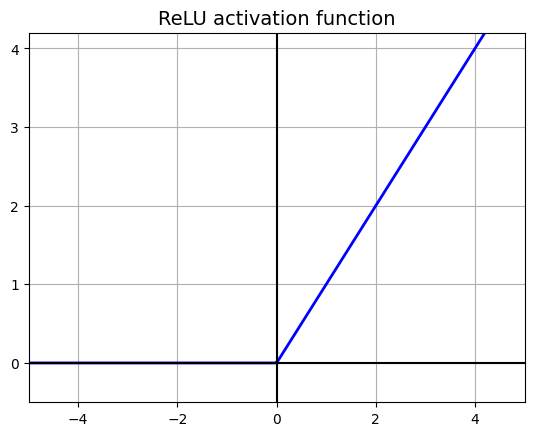

In [10]:
# ReLU
def relu(z):
    return np.maximum(0, z)

plt.plot(z, relu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.title("ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [11]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.ReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.ReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 re_lu (ReLU)                (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 re_lu_1 (ReLU)              (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3651 - accuracy: 0.5960 - val_loss: 0.9132 - val_accuracy: 0.7100
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8138 - accuracy: 0.7355 - val_loss: 0.7229 - val_accuracy: 0.7636
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6913 - accuracy: 0.7739 - val_loss: 0.6499 - val_accuracy: 0.7868
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6272 - accuracy: 0.7951 - val_loss: 0.5937 - val_accuracy: 0.8042
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5855 - accuracy: 0.8080 - val_loss: 0.5594 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5557 - accuracy: 0.8155 - val_loss: 0.5351 - val_accuracy: 0.8240
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5334 - accuracy: 0.8216 - val_loss: 0.5150 - val_accuracy:

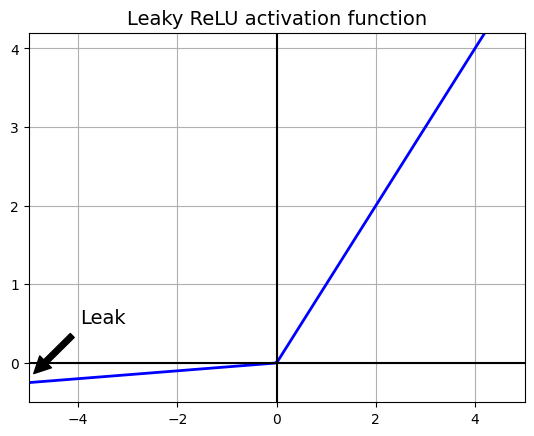

In [13]:
# Leaky ReLU
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [14]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(0.01),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(0.01),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3140 - accuracy: 0.6055 - val_loss: 0.9073 - val_accuracy: 0.7092
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8225 - accuracy: 0.7283 - val_loss: 0.7364 - val_accuracy: 0.7532
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7095 - accuracy: 0.7646 - val_loss: 0.6658 - val_accuracy: 0.7802
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6467 - accuracy: 0.7865 - val_loss: 0.6091 - val_accuracy: 0.8038
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6038 - accuracy: 0.8013 - val_loss: 0.5726 - val_accuracy: 0.8156
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5717 - accuracy: 0.8111 - val_loss: 0.5446 - val_accuracy: 0.8226
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5471 - accuracy: 0.8179 - val_loss: 0.5229 - val_accuracy:

In [16]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 p_re_lu (PReLU)             (None, 300)               300       
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 p_re_lu_1 (PReLU)           (None, 100)               100       
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 267010 (1.02 MB)
Trainable params: 267010 

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.3369 - accuracy: 0.5940 - val_loss: 0.8974 - val_accuracy: 0.7138
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8047 - accuracy: 0.7409 - val_loss: 0.7088 - val_accuracy: 0.7770
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6824 - accuracy: 0.7807 - val_loss: 0.6393 - val_accuracy: 0.7970
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6198 - accuracy: 0.7990 - val_loss: 0.5845 - val_accuracy: 0.8114
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5806 - accuracy: 0.8091 - val_loss: 0.5519 - val_accuracy: 0.8232
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5526 - accuracy: 0.8165 - val_loss: 0.5293 - val_accuracy: 0.8274
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5314 - accuracy: 0.8229 - val_loss: 0.5095 - val_accuracy:

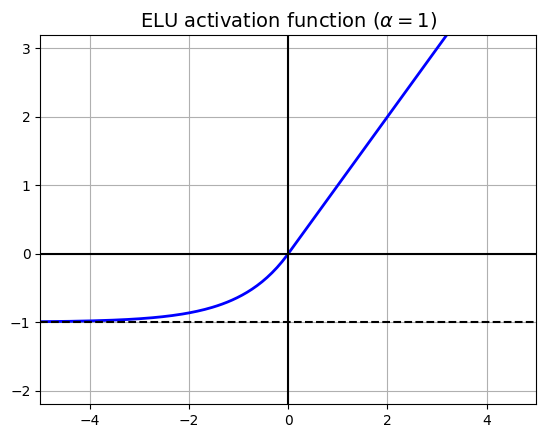

In [18]:
# ELU
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [19]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.1491 - accuracy: 0.6370 - val_loss: 0.7884 - val_accuracy: 0.7538
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7202 - accuracy: 0.7660 - val_loss: 0.6510 - val_accuracy: 0.7870
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6292 - accuracy: 0.7924 - val_loss: 0.5965 - val_accuracy: 0.8046
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5815 - accuracy: 0.8055 - val_loss: 0.5531 - val_accuracy: 0.8184
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5508 - accuracy: 0.8149 - val_loss: 0.5285 - val_accuracy: 0.8264
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5287 - accuracy: 0.8191 - val_loss: 0.5102 - val_accuracy: 0.8306
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5119 - accuracy: 0.8249 - val_loss: 0.4948 - val_accuracy:

In [21]:
# SELU
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

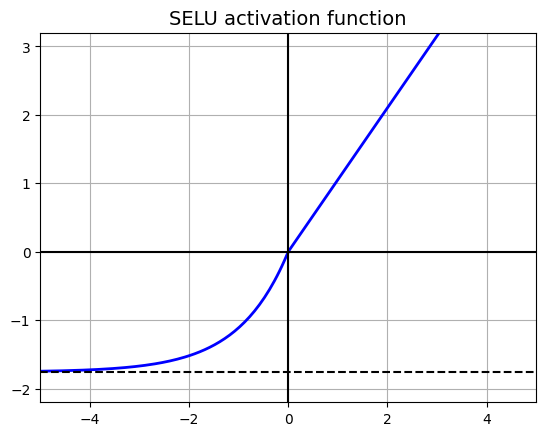

In [22]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [23]:
means = X_train.mean(axis=0, keepdims=True)
stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - means) / stds
X_valid_scaled = (X_valid - means) / stds

In [24]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(100):
  keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal")
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_101 (Dense)           (None, 10)                3010      
                                                                 
Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7319 - accuracy: 0.7478 - val_loss: 0.5607 - val_accuracy: 0.8114
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5247 - accuracy: 0.8179 - val_loss: 0.5004 - val_accuracy: 0.8312
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4824 - accuracy: 0.8330 - val_loss: 0.4766 - val_accuracy: 0.8384
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4586 - accuracy: 0.8421 - val_loss: 0.4586 - val_accuracy: 0.8456
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4425 - accuracy: 0.8472 - val_loss: 0.4473 - val_accuracy: 0.8496
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4299 - accuracy: 0.8525 - val_loss: 0.4399 - val_accuracy: 0.8516
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4202 - accuracy: 0.8552 - val_loss: 0.4313 - val_accuracy:

In [26]:
[activation for activation in dir(keras.activations) if not activation.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'mish',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [27]:
[layer for layer in dir(keras.layers) if "relu" in layer.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

## 3.배치 정규화

In [28]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_102 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_103 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.8455 - accuracy: 0.7211 - val_loss: 0.5551 - val_accuracy: 0.8130
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5712 - accuracy: 0.8048 - val_loss: 0.4740 - val_accuracy: 0.8428
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5147 - accuracy: 0.8222 - val_loss: 0.4396 - val_accuracy: 0.8518
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4775 - accuracy: 0.8336 - val_loss: 0.4179 - val_accuracy: 0.8560
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4518 - accuracy: 0.8436 - val_loss: 0.4030 - val_accuracy: 0.8602
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4345 - accuracy: 0.8483 - val_loss: 0.3911 - val_accuracy: 0.8606
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4231 - accuracy: 0.8511 - val_loss: 0.3810 - val_accu

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_105 (Dense)           (None, 300)               235200    
                                                                 
 batch_normalization_4 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_106 (Dense)           (None, 100)              

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0218 - accuracy: 0.6738 - val_loss: 0.6575 - val_accuracy: 0.7946
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6662 - accuracy: 0.7822 - val_loss: 0.5456 - val_accuracy: 0.8224
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5899 - accuracy: 0.8008 - val_loss: 0.4933 - val_accuracy: 0.8376
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5397 - accuracy: 0.8155 - val_loss: 0.4611 - val_accuracy: 0.8466
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5070 - accuracy: 0.8264 - val_loss: 0.4399 - val_accuracy: 0.8534
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4877 - accuracy: 0.8295 - val_loss: 0.4221 - val_accuracy: 0.8572
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4697 - accuracy: 0.8379 - val_loss: 0.4086 - val_accur

## 4.그레디언트 클리핑

In [32]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)

In [33]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="mse", optimizer=optimizer)

# 전이학습
## 1.데이터 준비

In [34]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6)
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return ((X[~y_5_or_6], y_A), (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [35]:
X_train_A.shape, X_train_B.shape

((43986, 28, 28), (200, 28, 28))

## 2.작업 A를 수행하기 위한 모델 A 훈련

In [36]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 8)                 4

In [37]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 7s 4ms/step - loss: 0.5801 - accuracy: 0.8065 - val_loss: 0.3884 - val_accuracy: 0.8662
Epoch 2/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3545 - accuracy: 0.8764 - val_loss: 0.3268 - val_accuracy: 0.8857
Epoch 3/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3167 - accuracy: 0.8891 - val_loss: 0.2975 - val_accuracy: 0.8989
Epoch 4/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2970 - accuracy: 0.8965 - val_loss: 0.2855 - val_accuracy: 0.9068
Epoch 5/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.2835 - accuracy: 0.9024 - val_loss: 0.2757 - val_accuracy: 0.9108
Epoch 6/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2738 - accuracy: 0.9061 - val_loss: 0.2717 - val_accuracy: 0.9071
Epoch 7/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.2659 - accuracy: 0.9100 - val_loss: 0.2694 - val_accuracy:

In [38]:
model_A.save("my_model_A.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.작업 B를 수행하기 위한 모델 B 훈련

In [39]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 1)                 5

In [40]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 2s 69ms/step - loss: 0.8598 - accuracy: 0.5000 - val_loss: 0.5709 - val_accuracy: 0.7059
Epoch 2/20
7/7 [==============================] - 0s 28ms/step - loss: 0.4964 - accuracy: 0.7900 - val_loss: 0.4343 - val_accuracy: 0.8124
Epoch 3/20
7/7 [==============================] - 0s 28ms/step - loss: 0.3747 - accuracy: 0.8350 - val_loss: 0.3523 - val_accuracy: 0.8702
Epoch 4/20
7/7 [==============================] - 0s 36ms/step - loss: 0.3003 - accuracy: 0.8850 - val_loss: 0.2949 - val_accuracy: 0.9108
Epoch 5/20
7/7 [==============================] - 0s 31ms/step - loss: 0.2481 - accuracy: 0.9350 - val_loss: 0.2570 - val_accuracy: 0.9351
Epoch 6/20
7/7 [==============================] - 0s 31ms/step - loss: 0.2122 - accuracy: 0.9400 - val_loss: 0.2279 - val_accuracy: 0.9503
Epoch 7/20
7/7 [==============================] - 0s 37ms/step - loss: 0.1859 - accuracy: 0.9650 - val_loss: 0.2071 - val_accuracy: 0.9564
Epoch 8/20
7/7 [===========

## 4.전이학습 구현

In [41]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [42]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [43]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 43ms/step - loss: 0.4150 - accuracy: 0.7750 - val_loss: 0.4220 - val_accuracy: 0.7748
Epoch 2/4
7/7 [==============================] - 0s 31ms/step - loss: 0.3938 - accuracy: 0.7900 - val_loss: 0.4005 - val_accuracy: 0.7870
Epoch 3/4
7/7 [==============================] - 0s 31ms/step - loss: 0.3727 - accuracy: 0.8000 - val_loss: 0.3816 - val_accuracy: 0.7982
Epoch 4/4
7/7 [==============================] - 0s 18ms/step - loss: 0.3540 - accuracy: 0.8150 - val_loss: 0.3637 - val_accuracy: 0.8093


In [44]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 1s 58ms/step - loss: 0.2895 - accuracy: 0.8700 - val_loss: 0.2456 - val_accuracy: 0.8996
Epoch 2/16
7/7 [==============================] - 0s 18ms/step - loss: 0.1976 - accuracy: 0.9350 - val_loss: 0.1878 - val_accuracy: 0.9493
Epoch 3/16
7/7 [==============================] - 0s 31ms/step - loss: 0.1507 - accuracy: 0.9750 - val_loss: 0.1566 - val_accuracy: 0.9706
Epoch 4/16
7/7 [==============================] - 0s 31ms/step - loss: 0.1252 - accuracy: 0.9850 - val_loss: 0.1367 - val_accuracy: 0.9767
Epoch 5/16
7/7 [==============================] - 0s 18ms/step - loss: 0.1078 - accuracy: 0.9950 - val_loss: 0.1214 - val_accuracy: 0.9828
Epoch 6/16
7/7 [==============================] - 0s 17ms/step - loss: 0.0945 - accuracy: 0.9950 - val_loss: 0.1107 - val_accuracy: 0.9858
Epoch 7/16
7/7 [==============================] - 0s 31ms/step - loss: 0.0851 - accuracy: 0.9950 - val_loss: 0.1027 - val_accuracy: 0.9868
Epoch 8/16
7/7 [===========

In [45]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.1035 - accuracy: 0.9765


[0.1035233810544014, 0.9764999747276306]

In [46]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9960


[0.057929910719394684, 0.9959999918937683]

In [47]:
(100 - 97.75) / (100 - 98.90)

2.045454545454556

# 고속 옵티마이저
## 1.모멘텀 최적화

In [49]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

## 2.네스테로프 가속 경사

In [50]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

## 3.AdaGrad

In [51]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

## 4.RMSProp

In [52]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

## 5.Adam

In [54]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## 6.AdaMax

In [55]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## 7.Nadam

In [56]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# 학습률 스케줄링
## 1.지수 기반 스케줄링

In [60]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [61]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [62]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [63]:
n_epochs = 25
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7573 - accuracy: 0.7731 - val_loss: 0.6889 - val_accuracy: 0.8030 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6572 - accuracy: 0.7977 - val_loss: 0.6593 - val_accuracy: 0.8022 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6186 - accuracy: 0.8092 - val_loss: 0.6041 - val_accuracy: 0.8200 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5617 - accuracy: 0.8307 - val_loss: 0.6191 - val_accuracy: 0.7990 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5290 - accuracy: 0.8399 - val_loss: 0.5754 - val_accuracy: 0.8374 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4595 - accuracy: 0.8574 - val_loss: 0.5565 - val_accuracy: 0.8522 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 

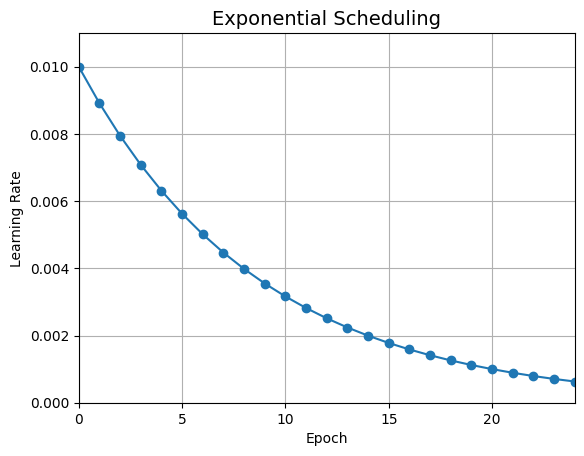

In [64]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## 2.구간별 고정 스케줄링

In [65]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [66]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [67]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [68]:
n_epochs = 25
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7522 - accuracy: 0.7758 - val_loss: 0.6327 - val_accuracy: 0.8322 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7686 - accuracy: 0.7750 - val_loss: 0.8401 - val_accuracy: 0.7618 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8140 - accuracy: 0.7681 - val_loss: 1.0977 - val_accuracy: 0.7372 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8461 - accuracy: 0.7544 - val_loss: 1.1810 - val_accuracy: 0.6454 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9201 - accuracy: 0.7055 - val_loss: 0.7596 - val_accuracy: 0.7422 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6359 - accuracy: 0.8010 - val_loss: 0.6360 - val_accuracy: 0.8242 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 7s

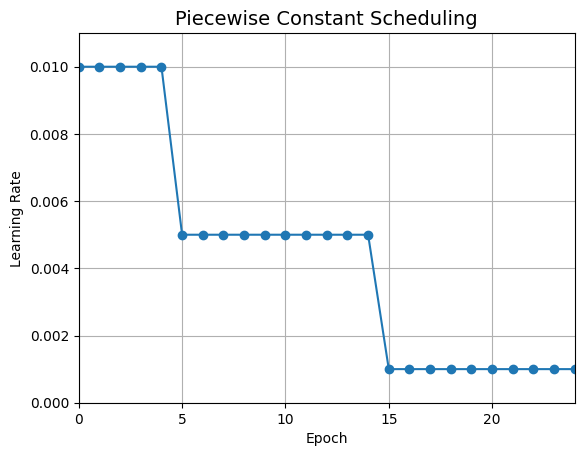

In [69]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## 3.성능 기반 스케줄링

In [70]:
tf.random.set_seed(42)
np.random.seed(42)

In [71]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [72]:
n_epochs = 25
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5902 - accuracy: 0.8054 - val_loss: 0.5003 - val_accuracy: 0.8490 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4896 - accuracy: 0.8416 - val_loss: 0.5740 - val_accuracy: 0.8418 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5133 - accuracy: 0.8419 - val_loss: 0.4638 - val_accuracy: 0.8606 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5235 - accuracy: 0.8451 - val_loss: 0.5768 - val_accuracy: 0.8248 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5309 - accuracy: 0.8476 - val_loss: 0.5748 - val_accuracy: 0.8542 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5234 - accuracy: 0.8515 - val_loss: 0.5038 - val_accuracy: 0.8642 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 6s

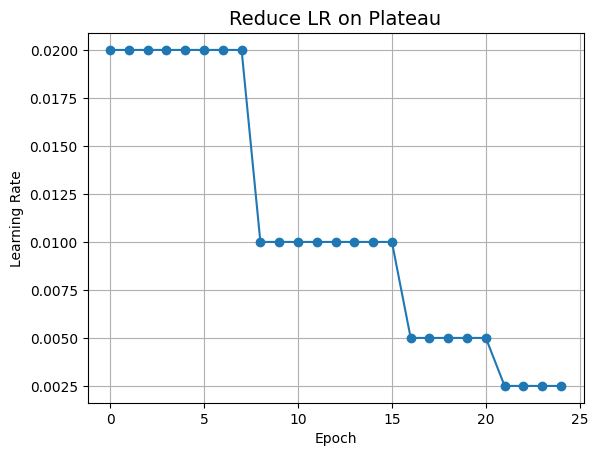

In [74]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Reduce LR on Plateau", fontsize=14)
plt.grid(True)
plt.show()

# 규제를 사용해 과대적합 피하기
## 1.$\ell_1$과 $\ell_2$ 규제

In [75]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [76]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [77]:
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 4ms/step - loss: 1.6061 - accuracy: 0.8140 - val_loss: 0.7065 - val_accuracy: 0.8402
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7187 - accuracy: 0.8293 - val_loss: 0.6898 - val_accuracy: 0.8334


In [78]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [79]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [80]:
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.6849 - accuracy: 0.8130 - val_loss: 0.7094 - val_accuracy: 0.8404
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7184 - accuracy: 0.8289 - val_loss: 0.6864 - val_accuracy: 0.8380
